In [1]:
from knowknow import *

In [2]:
db = Dataset('sociology-wos-74b')

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


# original

Cited authors are less prone to imminent death than both writing authors and cited works. 
Figure 20 shows the probability of death by 2005, 
    by cohort and definition of death. 
Authors which were first cited anywhere in 1950-1975 have approximately the same chance of death by 2005, 
    around 50%, depending on the definition of death. 
Of authors who were first cited 1970-1975, 43% are dead0 by 2005.
From Figure 11, the probability of an author dying1 in the next five years, 
    given it is still living1 is about 10%. 
One might expect that this chance decreases with age, 
    but it appears from this figure that this probability of death is not heavily dependent on either cohort or age. 
For all cohorts of cited authors, 
    the 21st century has meant a decrease in the probability of dying0.1, 
    given it is still alive0.1.

In [3]:
#display(Markdown("""
#On average, a cited work has a {n1:0.0%} chance of dying (β = 0.1) in the next 5 years,
#    compared to {n2:0.0%} for cited authors,
#    and {n3:0.0%} for citing authors.
#""".format(**locals())))

# deaths

In [4]:
births_deaths = require('citation-deaths/births_deaths')

In [5]:
dfs = {
    key: db.load_variable('%s.births_deaths' % key)
    for key in ['c','fa','ta']
}

loading variable sociology-wos-74b/c.births_deaths from disk
loading variable sociology-wos-74b/fa.births_deaths from disk
loading variable sociology-wos-74b/ta.births_deaths from disk


In [6]:
df = dfs['c']

In [7]:
def cnt_trues(x):
    return len( np.where(x)[0] )

In [8]:
START = 1960
END = 1995

In [9]:
linestyles = ['-','--','-.']

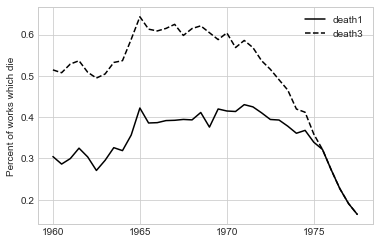

In [10]:
filt0 = (
    (df['first'] >= START)#&
    #(df['total'] < 10)
)

props = []

years = range(START,END+1)
for YY in years:
    
    count_dead = len( np.where(
        filt0 &
        (-1 < df.death1) & #didn't die
        (df.death1 < YY+15) &
        (df['first'] == YY)
    )[0] )
    
    count_possible = len(np.where(
        filt0 &
        (df['first'] == YY)
    )[0])
    
    props.append(count_dead/count_possible if count_possible else -1)

plt.plot(props, linestyle=linestyles[0], color='black', label='death1')

props = []

years = range(START,END+1)
for YY in years:
    
    count_dead = len( np.where(
        filt0 &
        (-1 < df.death1) & #didn't die
        (df.death3 < YY+15) &
        (df['first'] == YY)
    )[0] )
    
    count_possible = len(np.where(
        filt0 &
        (df['first'] == YY)
    )[0])
    
    props.append(count_dead/count_possible if count_possible else -1)

plt.plot(props, linestyle=linestyles[1], color='black', label='death3')

plt.ylabel('Percent of works which die')
plt.xticks(range(0,END-START,10),range(START,END,5));
plt.legend();

(0.0, 110.0)

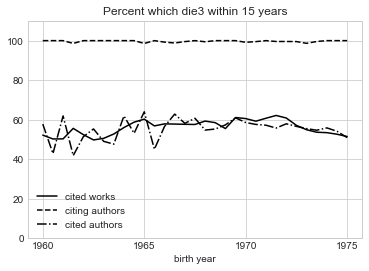

In [11]:
labels = {
    'c':'cited works',
    'fa':'citing authors',
    'ta':'cited authors'
}

for i,key in enumerate(['c','fa','ta']):
    df = dfs[key]
    
    filt0 = (
        (df['first'] >= START)&
        (df['total'] < 10)
    )
    
    props = []

    years = range(START,2015 - 25 + 1)
    for YY in years:

        count_dead = len( np.where(
            filt0 &
            (-1 < df.death1) & #didn't die
            (df.death1 < YY+15) &
            (df['first'] == YY)
        )[0] )

        count_possible = len(np.where(
            filt0 &
            (df['first'] == YY)
        )[0])

        props.append(count_dead/count_possible if count_possible else -1)

    plt.plot(100*np.array(props), linestyle=linestyles[i], color='black', label=labels[key])

plt.xlabel('birth year')
plt.title('Percent which die3 within 15 years')
plt.xticks(range(0,END-START,10),range(START,END,5));
plt.legend()
plt.ylim(0,110)

In [12]:
display(Markdown("""
Cited authors are less prone to imminent death than both writing authors and cited works. 
""".format(**locals())))


Cited authors are less prone to imminent death than both writing authors and cited works. 


In [13]:
df = dfs['ta']

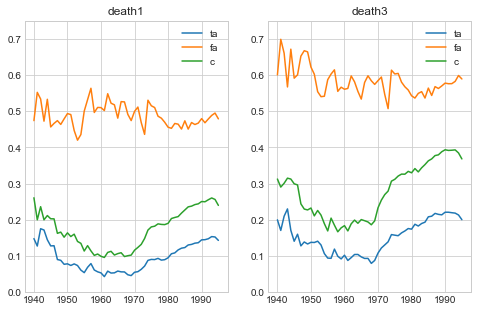

In [14]:
# dying in next 5 years given living
plt.figure(figsize=(8,5))
years = range(1940,2015-10-5-5+1)

for i,dd in enumerate(['death1','death3']):
    
    plt.subplot(1,2,i+1)

    for key in ['ta','fa','c']:
        df = dfs[key]

        props = []
        for YY in years:
            poss = (
                (df['first'] <= YY-5)&
                ((df[dd]==-1)|(df[dd]>=YY))
            )

            dead_next_5 = (
                poss &
                (df[dd] >= YY)&
                (df[dd] < YY+5)
            )

            props.append(
                cnt_trues(dead_next_5)/cnt_trues(poss)
            )

        plt.plot(props, label=key)
        
    plt.ylim(0,0.75)
    plt.xticks(range(0,len(years),10), list(years)[::10])
    plt.legend()
    plt.title(dd)

# dying in next 5 years given living from 1960-1970 cohort

## 1960 to 1965



Probability of death (β=0.1) in the next 5 years for the 1960-1965 cohort
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


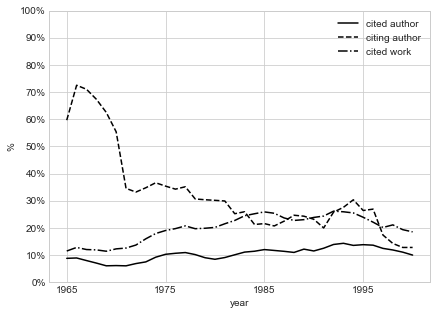

## 1965 to 1970



Probability of death (β=0.1) in the next 5 years for the 1965-1970 cohort
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


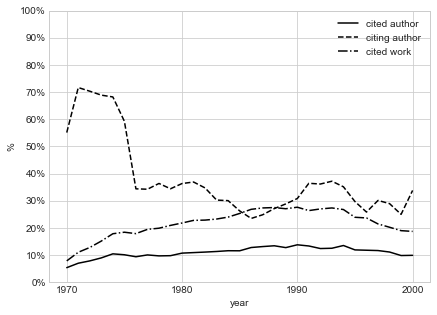

## 1970 to 1975



Probability of death (β=0.1) in the next 5 years for the 1970-1975 cohort
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


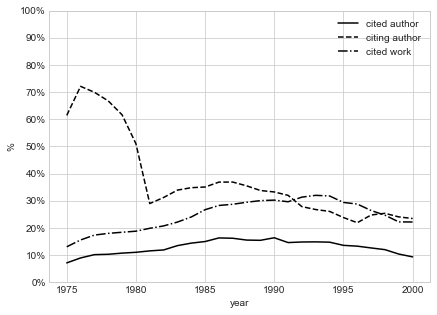

In [24]:
COHORTS = [(1960,1965),(1965,1970),(1970,1975)]
keynames = {
    'death1': 'death (β=0.1)',
    'death3': 'death (β=0.3)',
}
keynames2 = {
    'ta': 'cited author',
    'fa': 'citing author',
    'c': 'cited work'
}

for CS, CE in COHORTS:
    display(Markdown("## %s to %s\n\n" % (CS,CE)))
    plt.figure(figsize=(15,5))
    years = range(CE,2015-10-5+1)

    for i,dd in enumerate(['death1']):

        plt.subplot(1,2,i+1)

        for ii,key in enumerate(['ta','fa','c']):
            df = dfs[key]

            props = []
            for YY in years:
                poss = (
                    (df['first'] >= CS)&
                    (df['first'] <= CE)&
                    ((df[dd]==-1)|(df[dd]>=YY))
                )

                dead_next_5 = (
                    poss &
                    (df[dd] >= YY)&
                    (df[dd] <= YY+4)
                )

                c1 = cnt_trues(dead_next_5)
                c2 = cnt_trues(poss)
                props.append( c1/c2 if c2>0 else -1 )

            plt.plot(props, label=keynames2[key], linestyle=linestyles[ii],color='black')

        plt.ylim(0,1)
        ps = np.arange(0,1+0.001,0.1)
        plt.yticks(
            ps,
            ["{:0.0%}".format(x) for x in ps]
        )
        ntick = 10
        if len(years) < 30:
            ntick = 5
        plt.xticks(range(0,len(years),ntick), list(years)[::ntick])
        plt.legend()
        print("Probability of %s in the next 5 years for the %s-%s cohort" % (keynames[dd],CS,CE))
        #plt.title("Probability of %s in the next 5 years\nfor the %s-%s cohort" % (keynames[dd],CS,CE))
        plt.ylabel("%" )
        plt.xlabel("year")
        
    db.save_figure('prob death 5 %s-%s'%(CS,CE))
    plt.show()

From **Figure 11**, the probability of an author dying1 in the next five years, 
    given it is still living1 is about 10%. [somewhat true]

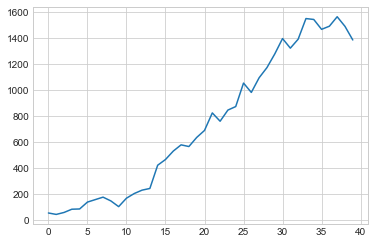

In [16]:
df = dfs['c']

cc = Counter(df[df.death3>0].death3)

plt.plot([cc[yy] for yy in range(1960,2000)])

In [17]:
df = dfs['ta']

In [18]:
allf = (
    (df['first'] <= 1975) &
    (df['first'] >= 1970)
)

n1 = cnt_trues( (
    allf &
    (-1 < df.death3) & # died
    (df.death3 < df['first']+20) 
) ) / cnt_trues( allf )

n2 = cnt_trues( (
    allf &
    (-1 < df.death1) & # died
    (df.death1 < df['first']+20) 
) ) / cnt_trues( allf )

In [19]:
display(Markdown("""
Of authors who were first cited 1970-1975, {n1:.0%} are dead3 within 20 years.
{n2:.0%} are dead1.
""".format(**locals())))


Of authors who were first cited 1970-1975, 55% are dead3 within 20 years.
36% are dead1.


In [20]:
display(Markdown("""
One might expect that this chance decreases with age, 
    but it appears from this figure that the likelihood of death is not heavily dependent on either cohort or age. 
""".format(**locals())))


One might expect that this chance decreases with age, 
    but it appears from this figure that this probability of death is not heavily dependent on either cohort or age. 
